In [72]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

def leermd(filename):
    result = []
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    nparray = df.values
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
    return result

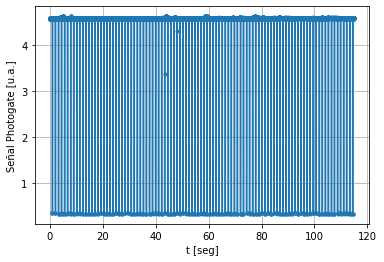

In [73]:
ts,ph = leermd('130.txt')
plt.plot(ts,ph,'.-')
plt.grid('on')
plt.xlabel('t [seg]')
plt.ylabel('Señal Photogate [u.a.]')
plt.show()

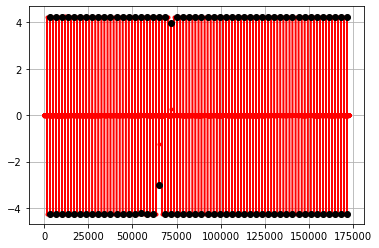

[2.1383330000000003, 4.4306665, 6.7219999999999995, 9.013667, 11.3053335, 13.597667000000001, 15.889667, 18.182000000000002, 20.473667, 22.765667, 25.057667000000002, 27.349667, 29.641666999999998, 31.933667, 34.225667, 36.517667, 38.809667000000005, 41.101667, 43.393667, 45.6853335, 47.977000000000004, 50.269000000000005, 52.561, 54.852999999999994, 57.1446665, 59.436333000000005, 61.728333, 64.020333, 66.312333, 68.603667, 70.895667, 73.187667, 75.4793335, 77.771, 80.06299999999999, 82.35466650000001, 84.646333, 86.938333, 89.23, 91.52199999999999, 93.81366700000001, 96.1053335, 98.39699999999999, 100.6886665, 102.980333, 105.27199999999999, 107.56366700000001, 109.85499999999999, 112.1466665, 114.438333]


In [75]:
plt.plot(np.diff(ph),'r.-')
plt.grid()

dph = np.diff(ph)

idx_i = np.where(dph<-2.5)[0]
idx_d = np.where(dph>2.5)[0]

idx_par_i = []
idx_par_d = []
for i in range(int(len(idx_i)/2)):
    idx_par_i.append(idx_i[2*i+1])
    idx_par_d.append(idx_d[2*i+1])

plt.plot(idx_par_i,dph[idx_par_i],'ko')
plt.plot(idx_par_d,dph[idx_par_d],'ko')
plt.show()

temps = []
for i in range(len(idx_par_d)):
    temps.append((ts[idx_par_i[i]]+ts[idx_par_d[i]])/2)
print(temps)